In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2023-11-10 06:38:42.204062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 06:38:42.388867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-10 06:38:42.388892: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-10 06:38:43.318843: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [3]:
def build_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad()
}

2023-11-10 06:38:46.033781: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-10 06:38:46.033812: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-10 06:38:46.033835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2023-11-10 06:38:46.035423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
results = {}  # Dictionary to store results

for optimizer_name, optimizer in optimizers.items():
    model = build_model(optimizer)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=0)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    results[optimizer_name] = {
        'loss': loss,
        'accuracy': accuracy,
        'history': history
    }
    print(f'{optimizer_name} - Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

SGD - Test loss: 0.1230, Test accuracy: 0.9629
Adam - Test loss: 0.1017, Test accuracy: 0.9738
RMSprop - Test loss: 0.1332, Test accuracy: 0.9764
Adagrad - Test loss: 0.2959, Test accuracy: 0.9173


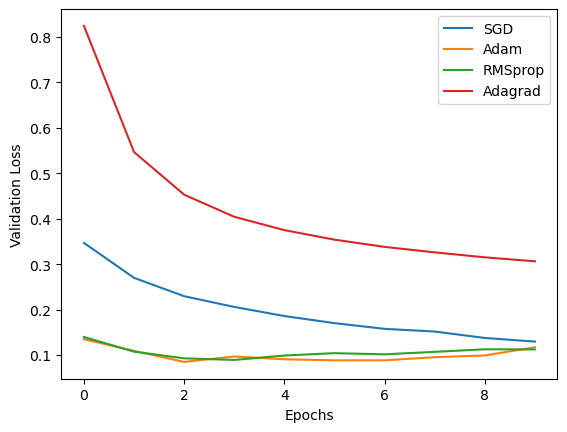

In [6]:
for optimizer_name, result in results.items():
    plt.plot(result['history'].history['val_loss'], label=f'{optimizer_name}')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()